<a href="https://colab.research.google.com/github/sidle34/allofthestuff/blob/Notebooks/SVMandLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the MNIST dataset and split it into training and testing sets, with 20% of the data allocated for testing.

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [ ]:
mnist=fetch_openml("mnist_784",version=1)

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
#Split data
X=mnist.data
y=mnist.target.astype(int)

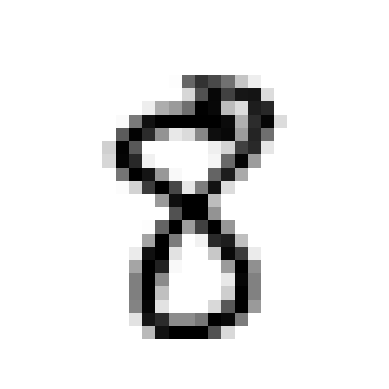

In [ ]:
#Visualize data
some_dig=X.iloc[46].to_numpy()
some_dig_pic=some_dig.reshape(28,28)
plt.imshow(some_dig_pic,cmap=plt.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
#Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Split train and test sets
mnistX_train, mnistX_test, mnisty_train, mnisty_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Apply the One-versus-All (OvA) strategy to the MNIST dataset using both SVM and Logistic Regression.

In [ ]:
#Logistic regression model
Log_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
Log_model.fit(mnistX_train, mnisty_train)

y_pred_log=Log_model.predict(mnistX_test)

In [ ]:
#SVM model
model_SVM=OneVsRestClassifier(LinearSVC(C=0.1, max_iter=20000))
SVM_model=model_SVM.fit(mnistX_train, mnisty_train)

y_pred_SVM=SVM_model.predict(mnistX_test)

# Calculate the accuracy of the models you trained in the previous section and compare their performance.

In [ ]:
#Print the accuracy score for the logistric regression model
log_accuracy=accuracy_score(mnisty_test, y_pred_log)
print("Logistic Regression Classification Report:\n", classification_report(mnisty_test, y_pred_log))
print("Logistic Regression Accuracy Score:", log_accuracy)
print("\n")
#Print the accuracy score for the SVM model
SVM_accuracy=accuracy_score(mnisty_test, y_pred_SVM)
print("SVM Classification Report:\n", classification_report(mnisty_test, y_pred_SVM))
print("SVM Accuracy Score:", SVM_accuracy)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.89      0.89      0.89      1433
           4       0.91      0.93      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.88      0.84      0.86      1357
           9       0.90      0.89      0.89      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.92      0.91     14000

Logistic Regression Accuracy Score: 0.9152142857142858
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
     

They performed equally well, but for the amount of computation time, the Linear Regression model was much more effiecient and just as precise and accurate as the SVM model. The Linear Regression model is much more equipped to handle large data sets such as the MNIST data set. Therefore, I would advise using the Linear Regression model in this instance.